# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# 2. Import data

In [2]:
data = pd.read_csv("https://s3.amazonaws.com/marvin-engines-data/spam.csv",encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's drop the unwanted columns, and rename the column name appropriately.

In [4]:
#Drop column and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [8]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# 3. Train Test Split
Before performing text transformation, let us do train test split. Infact, we can perform k-Fold cross validation. However, due to simplicity, I am doing train test split.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 10)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# 4.Text Transformation
Various text transformation techniques such as stop word removal, lowering the texts, tfidf transformations, prunning, stemming can be performed using sklearn.feature_extraction libraries. Then, the data can be convereted into bag-of-words. <br> <br>
For this problem, Let us see how our model performs without removing stop words.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vect = CountVectorizer()

Note : We can also perform tfidf transformation.

In [14]:
vect.fit(X_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

vect.fit function learns the vocabulary. We can get all the feature names from vect.get_feature_names( ). <br> <br> Let us print first and last twenty features

In [15]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

[u'00', u'000', u'000pes', u'008704050406', u'0089', u'0121', u'01223585236', u'01223585334', u'0125698789', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703']
[u'zyada', u'\xe5\xf0', u'\xe5\xf2harry', u'\xe5\xf2it', u'\xe5\xf4morrow', u'\xe5\xf4rents', u'\xec_', u'\xec\xbc1', u'\xec\xe4', u'\xec\xef', u'\xf3_', u'\xfb_', u'\xfb_thanks', u'\xfb\xaam', u'\xfb\xaat', u'\xfb\xaave', u'\xfb\xef', u'\xfb\xefharry', u'\xfb\xf2', u'\xfb\xf3well']


In [16]:
X_train_df = vect.transform(X_train)

Now, let's transform the Test data.

In [17]:
X_test_df = vect.transform(X_test)

In [18]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

# 5. Visualisations 

In [19]:
ham_words = ''
spam_words = ''
spam = data[data.label_num == 1]
ham = data[data.label_num ==0]

In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [22]:
from wordcloud import WordCloud

In [23]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

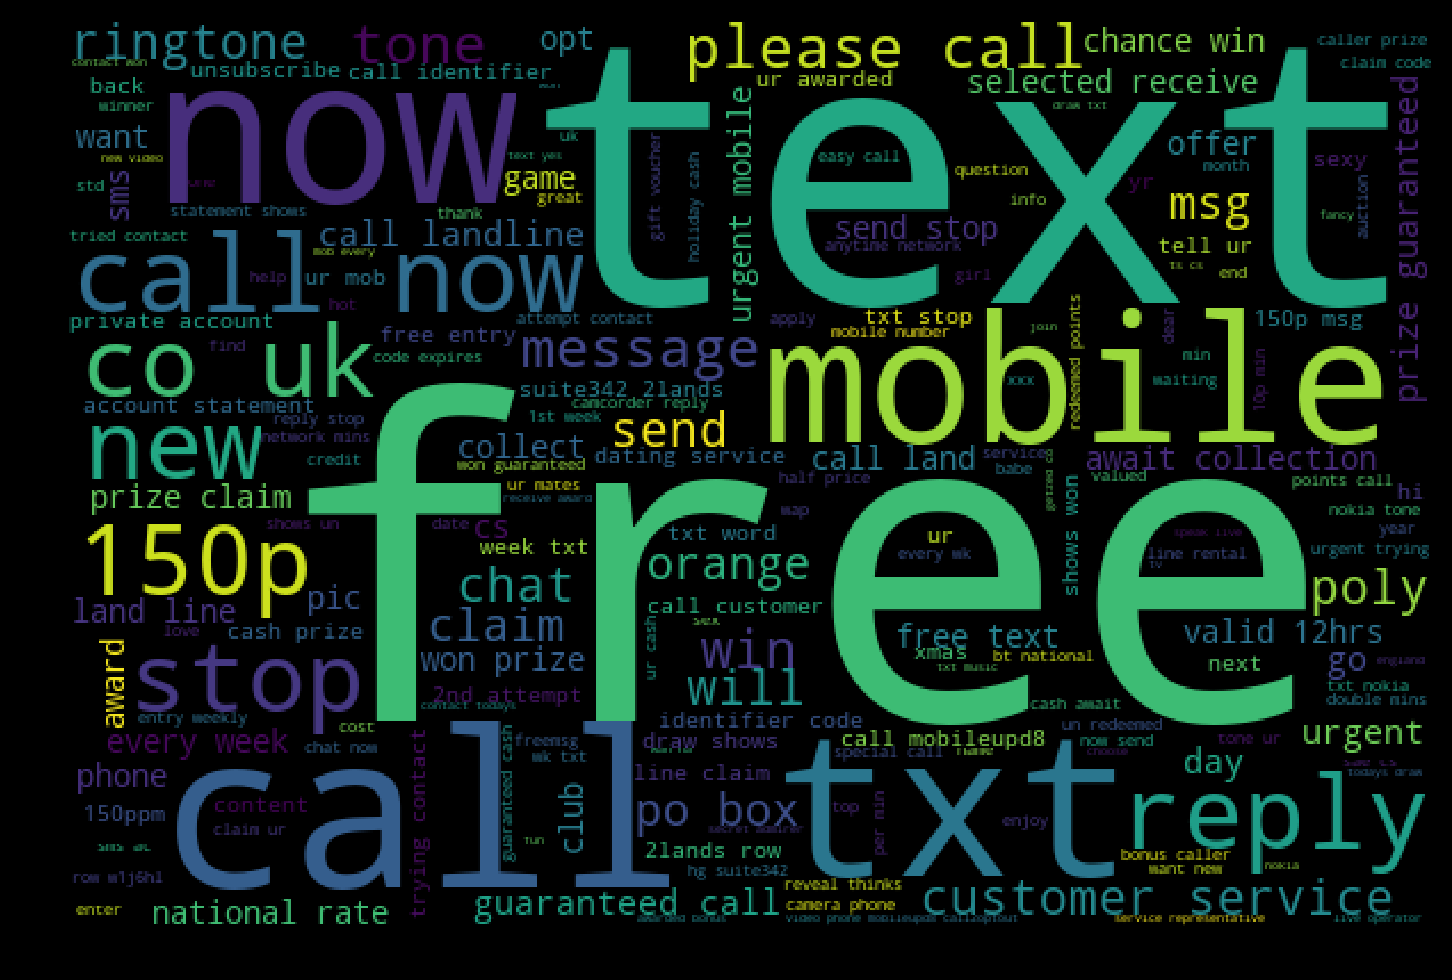

In [24]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

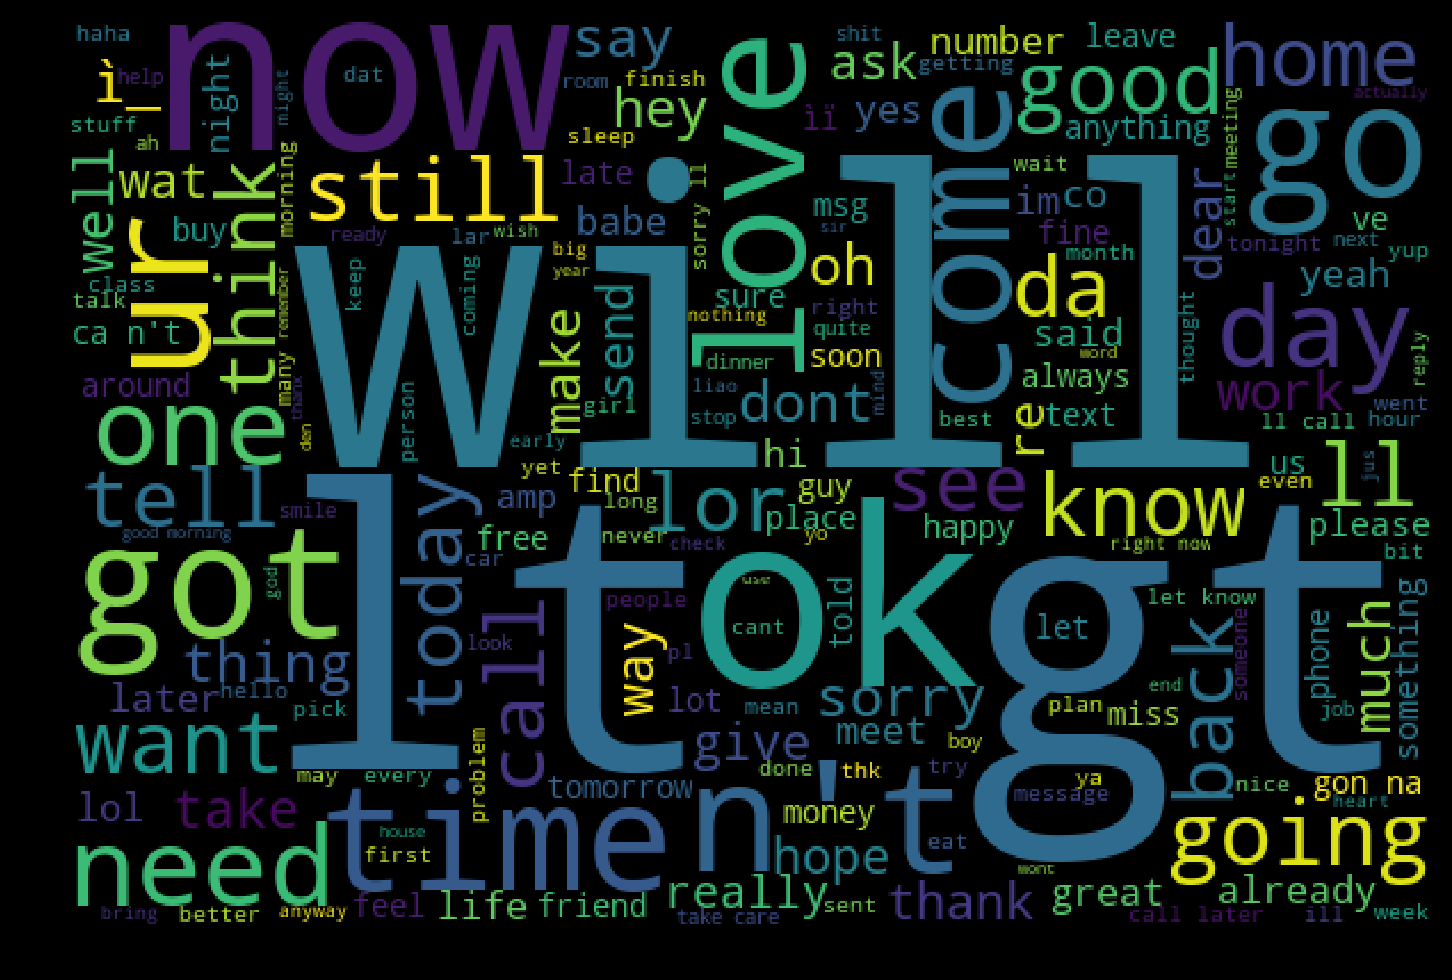

In [25]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 6. Machine Learning models:

### 6.1 Multinomial Naive Bayes
Generally, Naive Bayes works well on text data. Multinomail Naive bayes is best suited for classification with discrete features. 

In [26]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
prediction["Multinomial"] = model.predict(X_test_df)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
accuracy_score(y_test,prediction["Multinomial"])

0.98834080717488793

### 6.2 Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
prediction["Logistic"] = model.predict(X_test_df)

In [32]:
accuracy_score(y_test,prediction["Logistic"])

0.98026905829596411

### 6.3 $k$-NN classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
prediction["knn"] = model.predict(X_test_df)

In [35]:
accuracy_score(y_test,prediction["knn"])

0.91210762331838569

### 6.4 Ensemble classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
prediction["random_forest"] = model.predict(X_test_df)

In [38]:
accuracy_score(y_test,prediction["random_forest"])

0.9668161434977578

In [39]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [40]:
prediction["adaboost"] = model.predict(X_test_df)

In [41]:
accuracy_score(y_test,prediction["adaboost"])

0.96771300448430497

# 7. Parameter Tuning using GridSearchCV

Based, on the above four ML models, Naive Bayes has given the best accuracy. However, Let's try to tune the parameters of $k$-NN using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
k_range = np.arange(1,30)

In [44]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [45]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid.grid_scores_

# 8. Model Evaluation

In [ ]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

In [ ]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

In [ ]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# 9. Future works

In [ ]:
print(conf_mat)

By seeing the above confusion matrix, it is clear that 5 Ham are mis classified as Spam, and 8 Spam are misclassified as Ham. Let'see what are those misclassified text messages. Looking those messages may help us to come up with more advanced feature engineering.

In [ ]:
pd.set_option('display.max_colwidth', -1)

I increased the pandas dataframe width to display the misclassified texts in full width. 

### 9.1 Misclassified as Spam

In [ ]:
X_test[y_test < prediction["Multinomial"] ]

### 9.2 Misclassfied as Ham

In [ ]:
X_test[y_test > prediction["Multinomial"] ]

It seems length of the spam text is much higher than the ham. Maybe we can include length as a feature.  In addition to unigram, we can also try bigram features. 